In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-crocodile-species-dataset/crocodile_dataset.csv


In [2]:
!pip install lightgbm

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import geopandas as gpd
import lightgbm as lgb
from lightgbm import LGBMClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.DataFrame(pd.read_csv("/kaggle/input/global-crocodile-species-dataset/crocodile_dataset.csv"))

In [5]:
df.head(5)

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Observation ID        1000 non-null   int64  
 1   Common Name           1000 non-null   object 
 2   Scientific Name       1000 non-null   object 
 3   Family                1000 non-null   object 
 4   Genus                 1000 non-null   object 
 5   Observed Length (m)   1000 non-null   float64
 6   Observed Weight (kg)  1000 non-null   float64
 7   Age Class             1000 non-null   object 
 8   Sex                   1000 non-null   object 
 9   Date of Observation   1000 non-null   object 
 10  Country/Region        1000 non-null   object 
 11  Habitat Type          1000 non-null   object 
 12  Conservation Status   1000 non-null   object 
 13  Observer Name         1000 non-null   object 
 14  Notes                 1000 non-null   object 
dtypes: float64(2), int64(1

In [7]:
print(df['Common Name'].unique())
print("No of Unique Crocodiles : ")
print(len(df['Common Name'].unique()))

["Morelet's Crocodile" 'American Crocodile' 'Orinoco Crocodile'
 'Mugger Crocodile (Marsh Crocodile)' 'Siamese Crocodile'
 'Congo Dwarf Crocodile' 'West African Crocodile'
 'West African Dwarf Crocodile' 'Nile Crocodile'
 'Borneo Crocodile (disputed)' 'Saltwater Crocodile' 'Cuban Crocodile'
 'Philippine Crocodile' 'New Guinea Crocodile'
 'West African Slender-snouted Crocodile'
 "Freshwater Crocodile (Johnstone's)"
 'Central African Slender-snouted Crocodile' "Hall's New Guinea Crocodile"]
No of Unique Crocodiles : 
18


In [8]:
df['Date of Observation'] = pd.to_datetime(df['Date of Observation'],dayfirst = True)

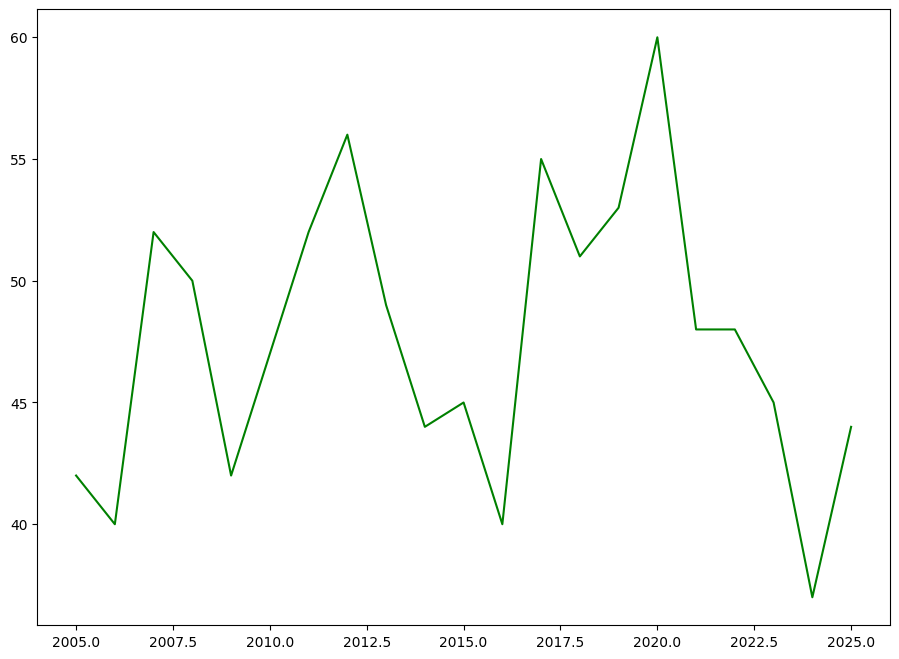

In [9]:
plt.figure(figsize = (11,8))
gk = df['Date of Observation'].dt.year.astype(int)
gk = pd.DataFrame(gk)
gk.sort_values(by = 'Date of Observation')
frame = gk.groupby("Date of Observation").size().reset_index(name="Count")
plt.plot(frame['Date of Observation'],frame['Count'],color = 'green')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [Text(0, 0, 'Egypt'),
  Text(1, 0, 'Costa Rica'),
  Text(2, 0, 'Uganda'),
  Text(3, 0, 'Mauritania'),
  Text(4, 0, 'Nepal'),
  Text(5, 0, 'Kenya'),
  Text(6, 0, 'South Africa'),
  Text(7, 0, 'Indonesia'),
  Text(8, 0, 'Chad'),
  Text(9, 0, 'USA (Florida)'),
  Text(10, 0, 'Sri Lanka'),
  Text(11, 0, 'Senegal'),
  Text(12, 0, 'Malaysia'),
  Text(13, 0, 'Sudan'),
  Text(14, 0, 'Gabon'),
  Text(15, 0, 'Thailand'),
  Text(16, 0, 'Iran (historic)'),
  Text(17, 0, 'Niger'),
  Text(18, 0, 'Laos'),
  Text(19, 0, 'Vietnam'),
  Text(20, 0, 'Tanzania'),
  Text(21, 0, 'Mali'),
  Text(22, 0, 'Cambodia'),
  Text(23, 0, 'Pakistan'),
  Text(24, 0, 'Central African Republic'),
  Text(25, 0, 'Nigeria'),
  Text(26, 0, 'Ghana'),
  Text(2

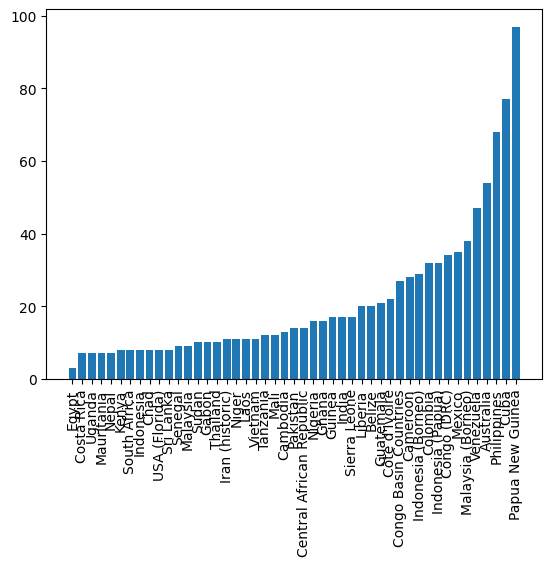

In [10]:
gh = df.groupby('Country/Region').size().reset_index(name = 'Count')
gh = gh.sort_values(by = 'Count')
plt.bar(gh['Country/Region'],gh['Count'])
plt.xticks(rotation = 'vertical')

/tmp/ipykernel_36/2908987378.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


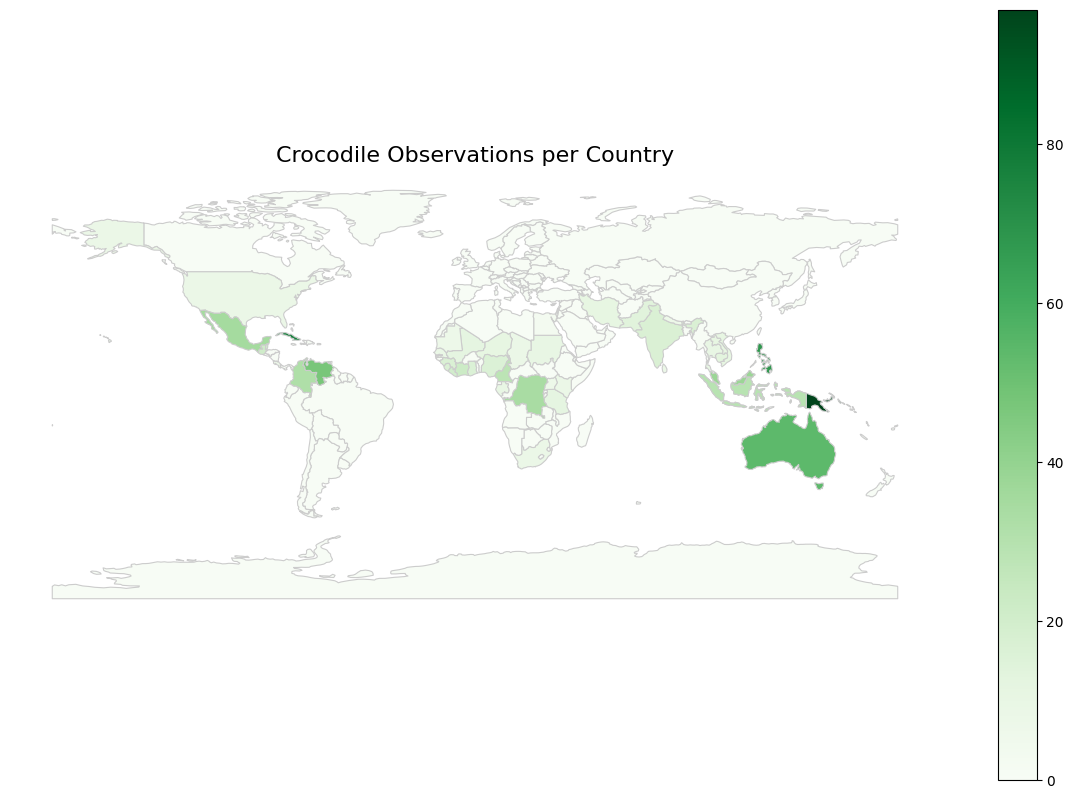

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

obs_per_country = df.groupby("Country/Region").size().reset_index(name="Count")

# Make sure country names match the world GeoDataFrame
obs_per_country.replace({"USA (Florida)": "United States of America"}, inplace=True)
obs_per_country.replace({"Congo (DRC)": "Dem. Rep. Congo"}, inplace=True)
obs_per_country.replace({"Malaysia (Borneo)": "Malaysia"}, inplace=True)
obs_per_country.replace({"Indonesia (Borneo)": "Indonesia"}, inplace=True)
obs_per_country.replace({"Iran (historic)": "Iran"}, inplace=True)

world = world.merge(obs_per_country, how="left", left_on="name", right_on="Country/Region")

world["Count"] = world["Count"].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column="Count", cmap="Greens", linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title("Crocodile Observations per Country", fontsize=16)
ax.axis('off')
plt.show()

In [12]:
df.columns 

Index(['Observation ID', 'Common Name', 'Scientific Name', 'Family', 'Genus',
       'Observed Length (m)', 'Observed Weight (kg)', 'Age Class', 'Sex',
       'Date of Observation', 'Country/Region', 'Habitat Type',
       'Conservation Status', 'Observer Name', 'Notes'],
      dtype='object')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'Rivers'),
  Text(1, 0, 'Swamps'),
  Text(2, 0, 'Forest Swamps'),
  Text(3, 0, 'Lakes'),
  Text(4, 0, 'Freshwater Wetlands'),
  Text(5, 0, 'Estuarine Systems'),
  Text(6, 0, 'Estuaries'),
  Text(7, 0, 'Mangroves'),
  Text(8, 0, 'Flooded Savannas'),
  Text(9, 0, 'Forest Rivers'),
  Text(10, 0, 'Reservoirs'),
  Text(11, 0, 'Small Streams'),
  Text(12, 0, 'Shaded Forest Rivers'),
  Text(13, 0, 'Large Rivers'),
  Text(14, 0, 'Marshes'),
  Text(15, 0, 'Freshwater Marshes'),
  Text(16, 0, 'Slow Streams'),
  Text(17, 0, 'Coastal Lagoons'),
  Text(18, 0, 'Billabongs'),
  Text(19, 0, 'Oases'),
  Text(20, 0, 'Lagoons'),
  Text(21, 0, 'Coastal Wetlands'),
  Text(22, 0, 'Slow Rivers'),
  Text(23, 0, 'Ponds'),
  Text(24, 0, 'Gorges'),
  Text(25, 0, 'Freshwater Rivers'),
  Text(26, 0, 'Oxbow Lakes'),
  Text(27, 0, 'Brackish 

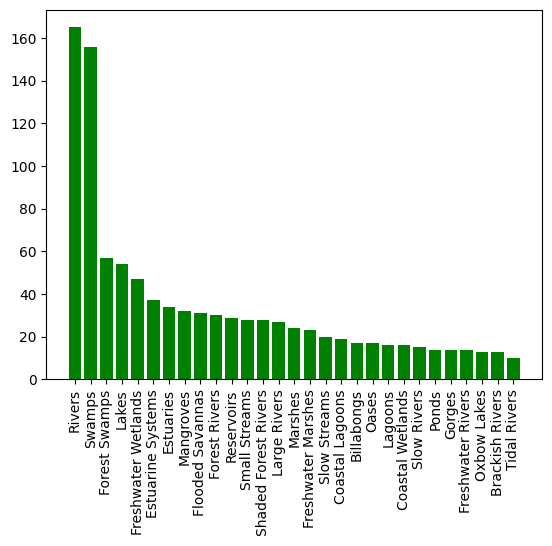

In [13]:
habitat = df.groupby("Habitat Type").size().reset_index(name = 'Count').sort_values(by = 'Count',ascending = False)
plt.bar(habitat['Habitat Type'],habitat['Count'],color = 'green')
plt.xticks(rotation = 'vertical')

In [14]:
df.columns

Index(['Observation ID', 'Common Name', 'Scientific Name', 'Family', 'Genus',
       'Observed Length (m)', 'Observed Weight (kg)', 'Age Class', 'Sex',
       'Date of Observation', 'Country/Region', 'Habitat Type',
       'Conservation Status', 'Observer Name', 'Notes'],
      dtype='object')

In [17]:
X = df[['Observed Length (m)', 'Observed Weight (kg)', 'Age Class', 'Sex',
'Country/Region', 'Habitat Type']]
Y = df['Scientific Name']  # convert to 2D
cols = ['Age Class','Sex','Country/Region','Habitat Type']
encoder = LabelEncoder()       # True → returns sparse matrix
Y_encoded = encoder.fit_transform(Y)
encoders = {}
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # save encoder if you need inverse_transform later

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)
model = LGBMClassifier(objective='multiclass', metric='multi_logloss', n_estimators=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 6
[LightGBM] [Info] Start training from score -2.834464
[LightGBM] [Info] Start training from score -2.971040
[LightGBM] [Info] Start training from score -2.752786
[LightGBM] [Info] Start training from score -3.101093
[LightGBM] [Info] Start training from score -2.877949
[LightGBM] [Info] Start training from score -2.834464
[LightGBM] [Info] Start training from score -3.021050
[LightGBM] [Info] Start training from score -2.752786
[LightGBM] [Info] Start training from score -3.021050
[LightGBM] [Info] Start training from score -2.813411
[LightGBM] [Info] Start training from score -2.590267
[LightGBM] [Info] Start training from sco

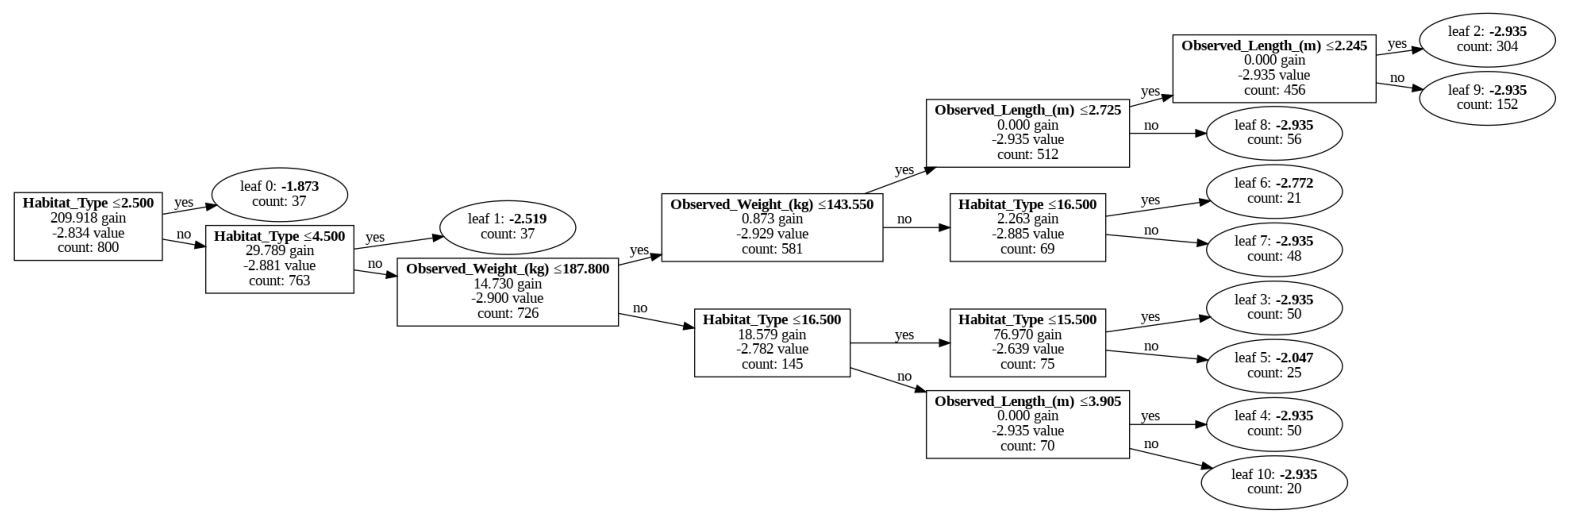

In [29]:
ax = lgb.plot_tree(model.booster_, tree_index=0, figsize=(20, 10), 
                   show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count'])

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       0.88      0.70      0.78        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        17
           6       1.00      0.90      0.95        10
           7       0.82      0.93      0.87        15
           8       0.88      1.00      0.93         7
           9       0.90      1.00      0.95         9
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        17
          12       1.00      1.00      1.00         9
          13       1.00      0.77      0.87        13
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        11
          16       1.00      1.00      1.00         9
          17       1.00    

<Axes: >

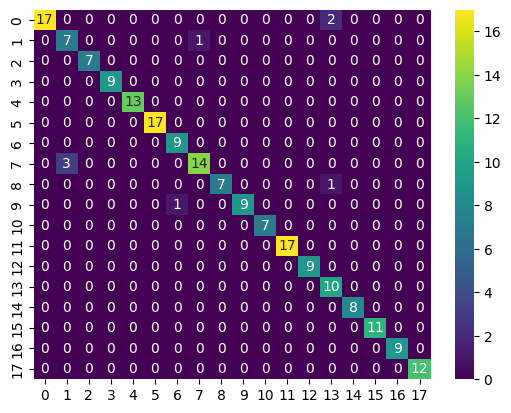

In [38]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,cmap = 'viridis')

In [56]:
user_input = [np.array(X.iloc[100])]
point = model.predict(user_input)
encoder.classes_[point]

array(['Crocodylus porosus'], dtype=object)

In [58]:
df.iloc[100]

Observation ID                                                        101
Common Name                                           Saltwater Crocodile
Scientific Name                                        Crocodylus porosus
Family                                                       Crocodylidae
Genus                                                          Crocodylus
Observed Length (m)                                                  4.86
Observed Weight (kg)                                                760.5
Age Class                                                               0
Sex                                                                     2
Date of Observation                                   2013-08-16 00:00:00
Country/Region                                                         34
Habitat Type                                                            4
Conservation Status                                         Least Concern
Observer Name                         

In [53]:
X.iloc[5]

Observed Length (m)       2.64
Observed Weight (kg)    137.40
Age Class                 0.00
Sex                       1.00
Country/Region           17.00
Habitat Type             21.00
Name: 5, dtype: float64